# Apple store apps review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
!ls app-store-apple-data-set-10k-apps/

AppleStore.csv	appleStore_description.csv


In [28]:
app_store = pd.read_csv('./app-store-apple-data-set-10k-apps/AppleStore.csv')

In [5]:
description = pd.read_csv('./app-store-apple-data-set-10k-apps/appleStore_description.csv')

In [6]:
description.head(2)

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...


In [77]:
app_store.head(2).T

,0,1
Unnamed: 0,1,2
id,281656475,281796108
track_name,PAC-MAN Premium,Evernote - stay organized
size_bytes,100788224,158578688
currency,USD,USD
price,3.99,0
rating_count_tot,21292,161065
rating_count_ver,26,26
user_rating,4,4
user_rating_ver,4.5,3.5


In [84]:
app_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


In [86]:
# app_store.describe()

In [31]:
app_store['prime_genre'].value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

In [32]:
app_store['currency'].value_counts()

USD    7197
Name: currency, dtype: int64

In [79]:
# Price amounts by genre
grouped_by_genre = app_store.groupby('prime_genre')['price'].sum().reset_index(name='Value')

In [110]:
grouped_by_genre

,prime_genre,Value
0,Book,200.54
1,Business,291.63
2,Catalogs,7.99
3,Education,1824.79
4,Entertainment,475.99
5,Finance,43.80
6,Food & Drink,97.80
7,Games,5533.95
8,Health & Fitness,344.96
9,Lifestyle,127.50


In [111]:
app_store[app_store['price'] == app_store.price.max()]

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1479,1714,551215116,LAMP Words For Life,583263232,USD,299.99,41,0,4.0,0.0,1.5.5,4+,Education,24,5,1,1


In [112]:
education = app_store[app_store['prime_genre'] == 'Education']

In [113]:
education_by_price = education.groupby('track_name')['price'].sum().reset_index(name='Value')
education_by_price.nlargest(10, columns=['Value'])

,track_name,Value
157,LAMP Words For Life,299.99
243,Proloquo2Go - Symbol-based AAC,249.99
9,Articulation Station Pro,59.99
10,Articulation Test Center Pro,59.99
7,AnkiMobile Flashcards,24.99
112,"Foundations Memory Work Tutorials, Cycle 2",15.99
304,Special Version - Explain Everything™ Whiteboard,15.99
398,Voice Dream Reader,14.99
426,ネイティブ1000人と作った英会話～日常英会話編～,12.99
409,iDoceo - teacher's assistant gradebook and pla...,11.99


In [114]:
education_free = education[
    (education['price'] == 0) &
    (education['user_rating'] > 4.5)
]
education_not_free = education[
    (education['price'] > 0) &
    (education['user_rating'] > 4.5)
]
len(education_free), len(education_not_free)

(5, 19)

In [117]:
education_free.T

,1920,2374,2655,2805,6077
Unnamed: 0,2233,2786,3155,3346,8568
id,635966718,777111034,875063456,897062509,1112162323
track_name,Memrise: learn languages,ChineseSkill -Learn Mandarin Chinese Language ...,Elevate - Brain Training and Games,Memorado Brain Training for Memory & Mindfulness,Highlights Monster Day
size_bytes,83949568,174596096,196350976,149256192,37062656
currency,USD,USD,USD,USD,USD
price,0,0,0,0,0
rating_count_tot,20383,6077,58092,2067,49
rating_count_ver,138,157,436,108,1
user_rating,5,5,5,5,5
user_rating_ver,4.5,5,5,5,5


In [ ]:
# Best rated apps

Text(0.5, 1.0, 'Distribution of best most rated apps by category')

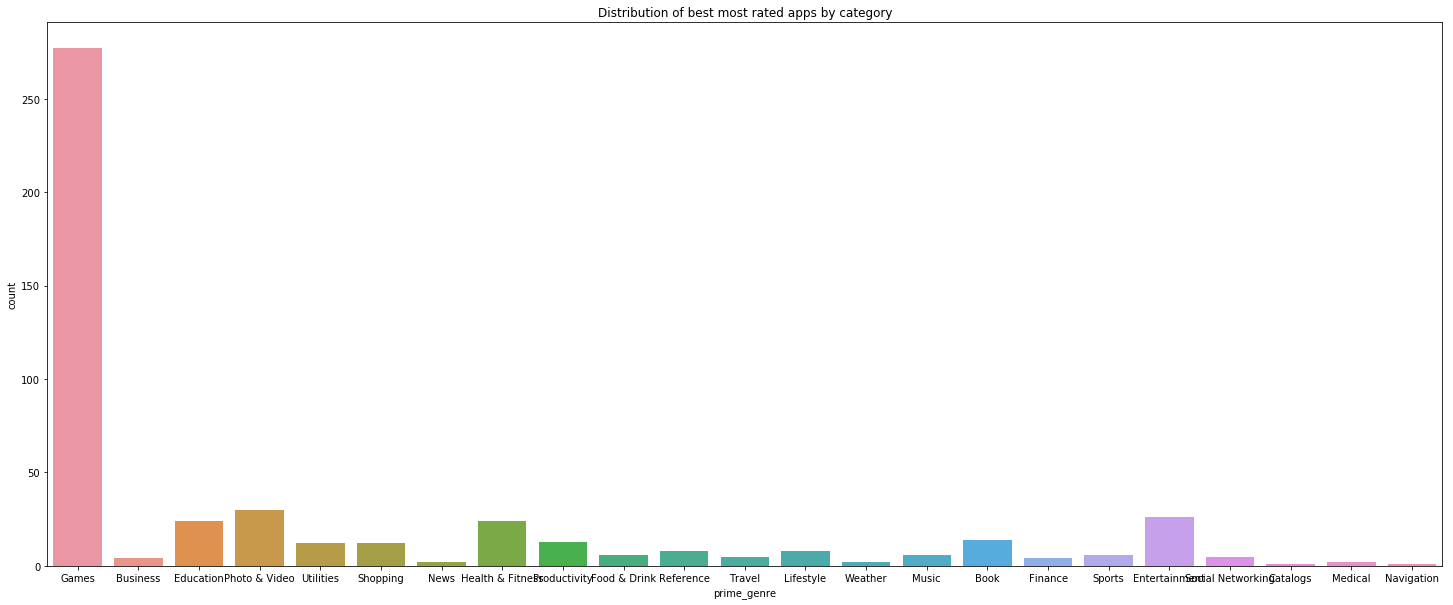

In [116]:
best_rating_apps = app_store[app_store['user_rating'] >= 5]
plt.figure(figsize=(25, 10))
plt.tight_layout()
sns.countplot(best_rating_apps['prime_genre'])
plt.title('Distribution of best most rated apps by category')

In [138]:
# education vs games

In [146]:
cols = ['track_name', 'price', 'user_rating', 'lang.num', 'prime_genre']

In [140]:
games = app_store[app_store['prime_genre'] == 'Games']

In [147]:
# top 10 most supported language game apps
games.nlargest(10, ['lang.num'])[cols]

,track_name,price,user_rating,lang.num,prime_genre
1157,Jigsaw Puzzle,0.0,4.5,46,Games
2170,War Commander: Rogue Assault,0.0,4.5,46,Games
3620,Kill Shot Bravo,0.0,4.5,46,Games
4994,My Cafe: Recipes & Stories - World Restaurant ...,0.0,4.5,46,Games
1288,The Sandbox - Building & Crafting a Pixel World!,0.0,4.5,45,Games
3938,Futurama: Game of Drones,0.0,4.5,45,Games
3997,Peanuts: Snoopy's Town Tale,0.0,3.5,45,Games
4682,Love and Hip Hop The Game,0.0,4.0,45,Games
4811,MARVEL Avengers Academy,0.0,4.0,45,Games
6518,Warlords - Turn Based Strategy,0.0,4.5,45,Games


In [148]:
# top 10 most supported language education apps
education.nlargest(10, ['lang.num'])[cols]

,track_name,price,user_rating,lang.num,prime_genre
2121,The Human Body by Tinybop,3.99,4.0,58,Education
3140,Simple Machines by Tinybop,2.99,3.5,58,Education
3141,The Robot Factory by Tinybop,0.00,4.0,58,Education
3859,The Everything Machine by Tinybop,2.99,4.0,58,Education
3860,The Earth by Tinybop,2.99,4.0,58,Education
4386,The Monsters by Tinybop,2.99,4.5,58,Education
5250,Weather by Tinybop,2.99,4.0,58,Education
5761,The Infinite Arcade by Tinybop,2.99,4.0,58,Education
6150,Skyscrapers by Tinybop,2.99,3.0,58,Education
6392,Space by Tinybop,2.99,4.5,58,Education


In [130]:
# the most supproted languages app
app_store[app_store['lang.num'] == app_store['lang.num'].max()]

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
3414,4130,962194608,Google Photos - unlimited photo and video storage,160215040,USD,0.0,88742,1145,5.0,5.0,2.17.0,4+,Photo & Video,37,5,75,1


In [152]:
# top 15 most supported languages apps
app_store.nlargest(15, ['lang.num'])[cols]

,track_name,price,user_rating,lang.num,prime_genre
3414,Google Photos - unlimited photo and video storage,0.00,5.0,75,Photo & Video
5780,Google Duo - simple video calling,0.00,4.0,74,Social Networking
2550,Google Docs,0.00,4.5,69,Productivity
2551,Google Sheets,0.00,4.5,69,Productivity
2676,Google Slides,0.00,4.0,69,Productivity
5777,Google Allo — smart messaging,0.00,3.5,68,Social Networking
2863,Inbox by Gmail,0.00,4.5,63,Productivity
681,Google Translate,0.00,3.5,59,Reference
2121,The Human Body by Tinybop,3.99,4.0,58,Education
3140,Simple Machines by Tinybop,2.99,3.5,58,Education


Text(0.5, 1.0, 'Genre vs languages')

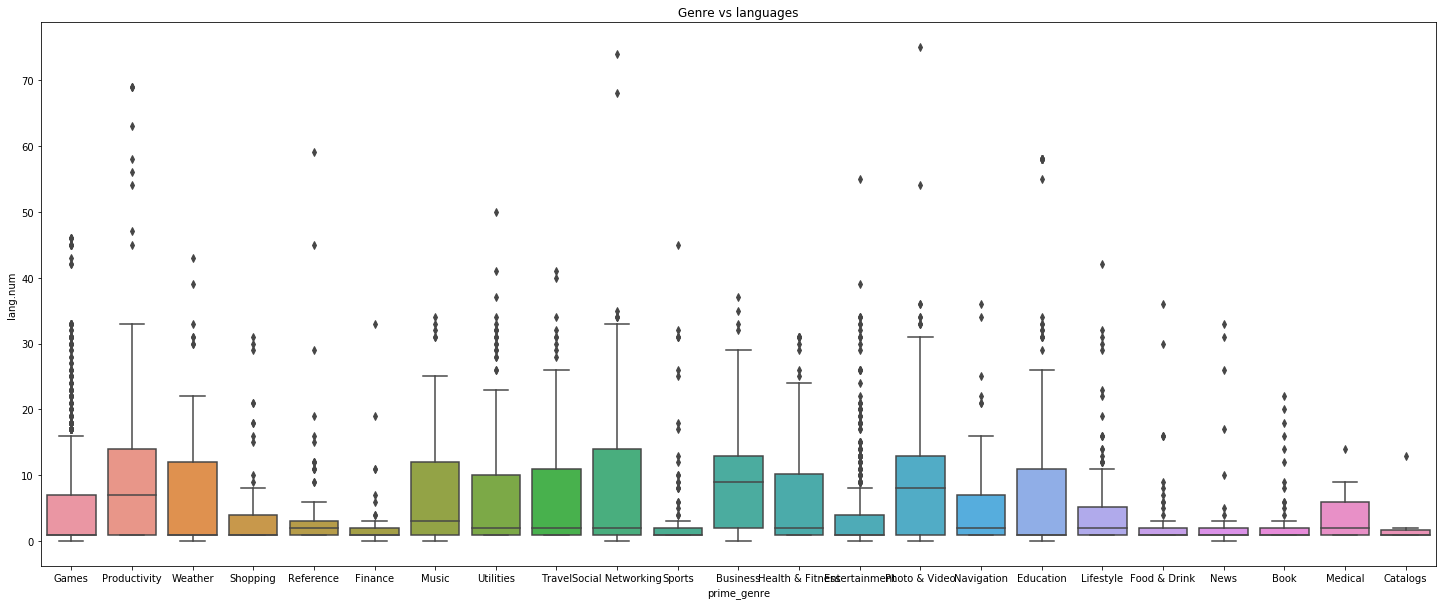

In [163]:
plt.figure(figsize=(25, 10))
sns.boxplot('prime_genre', 'lang.num', data=app_store)
plt.title('Genre vs languages')

In [162]:
app_store[app_store['lang.num'] > 60][cols]

,track_name,price,user_rating,lang.num,prime_genre
2550,Google Docs,0.0,4.5,69,Productivity
2551,Google Sheets,0.0,4.5,69,Productivity
2676,Google Slides,0.0,4.0,69,Productivity
2863,Inbox by Gmail,0.0,4.5,63,Productivity
3414,Google Photos - unlimited photo and video storage,0.0,5.0,75,Photo & Video
5777,Google Allo — smart messaging,0.0,3.5,68,Social Networking
5780,Google Duo - simple video calling,0.0,4.0,74,Social Networking
